<center>
<h1 align="center">Laboratorio de Estadística Computacional <br>con Python</h1>
<img src="https://raw.githubusercontent.com/sborquez/Python-LEC/master/resources/main-image-python.png" width="60%">
    
<h2 align="center">Tema 3: Distribuciones y Variables Aleatorias</h2>
<i>Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com" > sebastian.borquez.g@gmail.com</a> - DI UTFSM - Diciembre 2019.</i>
</center>

## Tabla de Contenido

* [Distribuciones](#3.1)
    * [Parametricas](#3.1.1)
    * [No-Paramétricas](#3.1.2)
* [Variables Aleatorias](#3.2)
* [Propiedades](#3.3)
* [Pdf y Pmf](#3.4)
* [Cdf](#3.5)

In [70]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<div id="3.1"></div>

## Distribuciones
<img src="https://docs.scipy.org/doc/scipy/reference/_static/img/scipy_org_logo.png" width="40%"></img>

[SciPy](https://docs.scipy.org/doc/scipy/reference/index.html)
**scipy.stats (Scientific Python Statistics)**, Scipy es un módulo para matemáticas, ciencia e ingeniería, su submódulo stats nos proporciona herramientas parael uso de distribuciones y variables aleatorias (**random variables**) incluye soporte para el uso de **arrays n dimensionales (ndarray)**.

Para poder utilizarlo debemos agregar la siguiente linea a nuestro código:

In [51]:
from scipy import stats

A continuación se revisarán los comandos básicos que se utilizarán durante esta actividad, para mayor información del módulo se recomienda revisar la [documentación](https://docs.scipy.org/doc/scipy/reference/stats.html) del submódulo.


<div id="3.1.1"></div>

### Distribuciones Paramétricas

El módulo cuenta con dos tipos de distribuciones paramétricas: **continuas** y **discretas**, las cuales se encuentran encapsuladas en las clases abstractas ``rv_continuous`` y ``rv_discrete`` de las cuales heredas las distribuciones.

Una lista completa con las distribuciones continuas disponibles en el submódulo se encuentran en este [link](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions). Ejemplos de estas son:

* Normal($\mu=5$, $\sigma=2$): ``stats.norm(loc=5, scale=2)``
* Gamma($\alpha=9$, $\beta=2$): ``stats.gamma(a=9, scale=(1/2))``

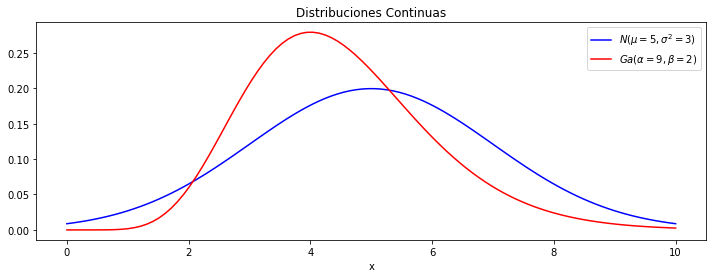

In [222]:
# Instanciar Distribuciones
N = stats.norm(loc=5, scale=2)
Ga = stats.gamma(a=9, scale=0.5)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal y Gamma
plt.plot(x, N.pdf(x), "b", label="$N(\\mu=5, \\sigma^2=3)$")
plt.plot(x, Ga.pdf(x),"r", label="$Ga(\\alpha=9, \\beta=2)$")

# Agregar estilo
plt.title("Distribuciones Continuas")
plt.xlabel("x")
plt.legend()
plt.show()

Una lista completa con las distribuciones discreats disponibles en el submódulo se encuentran en este [link](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions). Ejemplos de estas son:

* Bernoulli($p=0.3$): ``stats.bernoulli(p=0.3)``
* Poisson($\lambda=4$): ``stats.poisson(mu=4)``

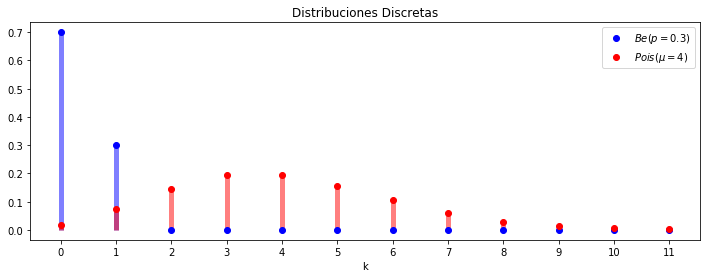

In [118]:
# Instanciar Distribuciones
Be = stats.bernoulli(p=0.3)
Pois = stats.poisson(mu=4)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos 
k = np.arange(12)

# Generar probabilidades para Bernoulli
plt.plot(k, Be.pmf(k), "bo", label="$Be(p=0.3)$")
plt.vlines(x, 0, Be.pmf(k), colors='b', lw=5, alpha=0.5)

# Generar probabilidades para Poisson
plt.plot(k, Pois.pmf(k), "ro", label="$Pois(\\mu=4)$")
plt.vlines(k, 0, Pois.pmf(k), colors='r', lw=5, alpha=0.5)

# Agregar estilo
plt.title("Distribuciones Discretas")
plt.xlabel("k")
plt.xticks(k)
plt.legend()
plt.show();

<div id="3.1.1"></div>

### Distribuciones No Paramétricas

El módulo cuenta además otro tipo de distribuciones **no paramétricas**, la cual genera una distribución a partir de una muestra empirica, a partir de datos en forma de **histograma**. Esta se encuentra en la clase ``rv_histogram``, la cual hereda de la clas ``rv_continuous``. La documentacion de esta clase se encuentra en este [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html#scipy.stats.rv_histogram).

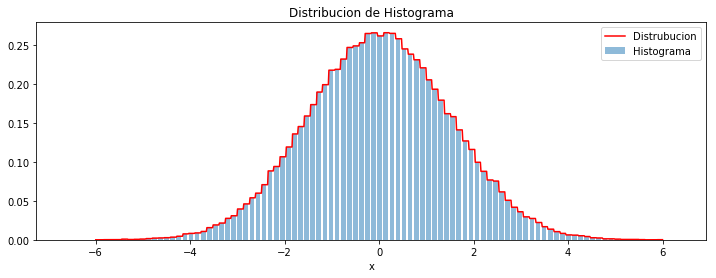

In [223]:
# Generar datos
data = stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)

# Generar histogramas
bins = 100
hist = np.histogram(data, bins=bins)

# Generar distribucion
hist_dist = stats.rv_histogram(hist)

# Generar figura
plt.figure(figsize=(12,4))

# Graficar histograma
plt.hist(data, density=True, bins=bins, alpha=0.5,label="Histograma", width=0.1);

# Generar probabilidades
x = np.linspace(-6, 6, 1000)
plt.plot(x, hist_dist.pdf(x), "r-", label="Distrubucion")

# Agregar estilo
plt.legend()
plt.title("Distribucion de Histograma")
plt.xlabel("x")
plt.show();

<div id="3.2"></div>

### Variables Aleatorias

Al instanciar las distribuciones, en realidad estaremos instanciado una clase del tipo ``rv_froze``, la cual representa a una **Variable Aleatoria (Random Variable)**.

In [188]:
type(N)

scipy.stats._distn_infrastructure.rv_frozen

Podemos utilizar esta clase para generar **muestras aleatorias** que se sigan una cierta regla. Por ejemplo:

$X_1,..., X_n$ son una muestra aleatoria, tal que $X_i$ ~ $N(5,2)$

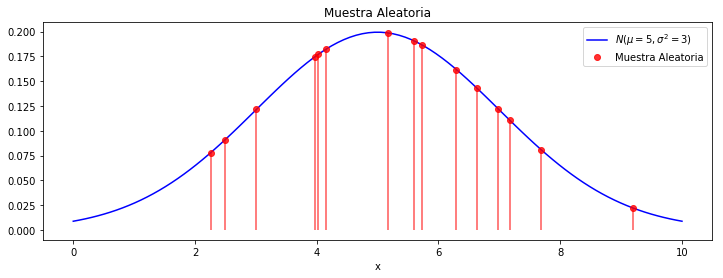

In [224]:
# Tamaño de muestra
n = 15

# Generar Muestra a partir de la distribucion N(5,2)
X_n = N.rvs(size=n)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal y Gamma
plt.plot(x, N.pdf(x), "b", label="$N(\\mu=5, \\sigma^2=3)$")
plt.plot(X_n, N.pdf(X_n), "ro", label="Muestra Aleatoria", alpha=0.8)
plt.vlines(X_n, 0, N.pdf(X_n), colors='r', lw=2, alpha=0.5)

# Agregar estilo
plt.title("Muestra Aleatoria")
plt.xlabel("x")
plt.legend()
plt.show()

<div id="3.3"></div>

### Propiedades

Podemos utilizar las variables aleatorias para calcular distintas propiedades de la distribución.

In [235]:
print("Gamma(alpha=9, beta=2)")
print("\tMedia:", Ga.mean())
print("\tMediana:", Ga.median())
print("\tDesviacion Estandar", Ga.std())
print("\tEsperanza:", Ga.expect())
print("\tVarianza:", Ga.var())

Gamma(alpha=9, beta=2)
	Media: 4.5
	Mediana: 4.334475592185185
	Desviacion Estandar 1.5
	Esperanza: 4.4999999999999964
	Varianza: 2.25


<div id="3.4"></div>

### PDF y PMF

Se pueden obtener la probabilidad para un valor en especifico. Para esto utilizamos el método ``.pdf(x)`` **(probability density function)** para las distribuciones continuas, y el método ``.pmf(k)`` **(probability mass function)** para las distribuciones discretas.

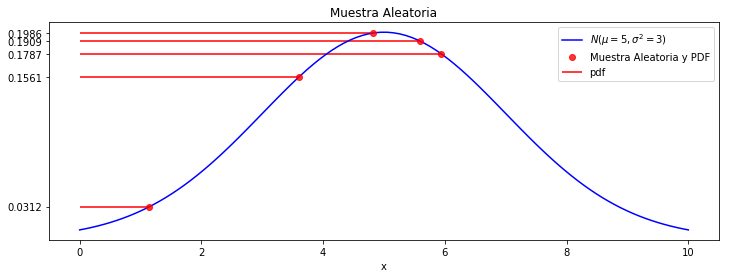

In [283]:
# Tamaño de muestra
n = 5

# Generar Muestra a partir de la distribucion N(5,2)
X_n = N.rvs(size=n)
pdfs = N.pdf(X_n) # <-- PDF

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal y pdf de la muestra
plt.plot(x, N.pdf(x), "b", label="$N(\\mu=5, \\sigma^2=3)$")
plt.plot(X_n, pdfs, "ro", label="Muestra Aleatoria y PDF", alpha=0.8)
#plt.vlines(X_n, 0, N.pdf(X_n), colors='r', lw=2, alpha=0.5)
plt.hlines(pdfs, 0, X_n, color="r", label="pdf")

# Agregar estilo
plt.title("Muestra Aleatoria")
plt.xlabel("x")
plt.yticks(pdfs)
plt.legend()
plt.show()

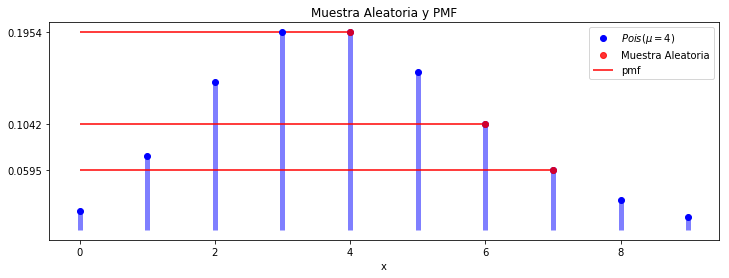

In [284]:
# Tamaño de muestra
n = 3

# Generar Muestra a partir de la distribucion Poisson(4)
X_n = Pois.rvs(size=n)
pmfs = Pois.pmf(X_n) #<--- PMF

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
k = np.arange(10)

# Generar probabilidades para Poisson y pmf de la muestra
plt.plot(k, Pois.pmf(k), "bo", label="$Pois(\\mu=4)$")
plt.vlines(k, 0, Pois.pmf(k), colors='b', lw=5, alpha=0.5)
plt.plot(X_n, pmfs, "ro", label="Muestra Aleatoria", alpha=0.8)
plt.hlines(pmfs, 0, X_n, color="r", label="pmf")



# Agregar estilo
plt.title("Muestra Aleatoria y PMF")
plt.xlabel("x")
plt.yticks(pmfs)
plt.legend()
plt.show()

<div id="3.5"></div>

### CDF

Finalmente, podemos obtener la **Cumulative distribution function** de una distribución con el método ``.cdf(x)`` para ambos tipos de distribuciones. 

<Figure size 864x288 with 0 Axes>

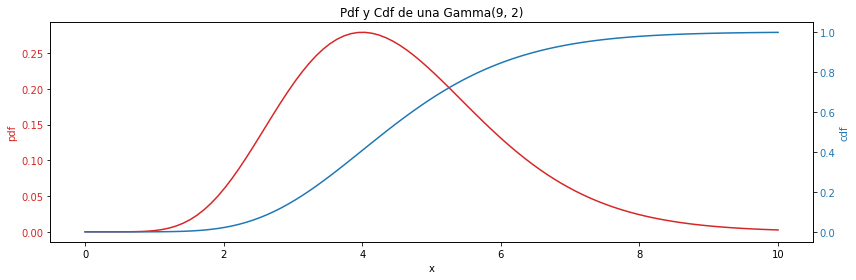

In [297]:
# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)
cdfs = Ga.cdf(x) # <-- CDF
pdfs = Ga.pdf(x)

# Generar figura
fig, ax1 = plt.subplots(figsize=(12, 4))

# PDF 
color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('pdf', color=color)
ax1.plot(x, pdfs, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y que comparte x

# CDF
color = 'tab:blue'
ax2.set_ylabel('cdf', color=color)
ax2.plot(x, cdfs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Estilo
plt.title("Pdf y Cdf de una Gamma(9, 2)")
fig.tight_layout()
plt.show();

Las distribuciones poseen más métodos que se invita a descubrir.

In [298]:
help(N)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here

In [299]:
help(Be)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here